# **Project Name**   - **Rossmann Retail Sales Prediction**

##### **Project Type**    - EDA/Regression/Classification/Unsupervised

Dataset Link :https://drive.google.com/file/d/1D54dSE3_bYWvJDZOtIUuXYACadtn6gkV/view?usp=drive_link

# **Project Summary -**

This open-ended ML Case Study allows you to explore machine learning applications across various industries. Select a project from the provided list or propose your own idea. Your project will demonstrate your ability to apply machine learning techniques, analyze data, and provide actionable insights.
The Rossmann dataset consists of two files:

**Sales Data (Rossmann Stores Data.csv):**

Contains 1,017,209 rows and 9 columns.

Key columns:

 * Store: Store ID.

 * DayOfWeek: Day of the week (1–7).

 * Date: Date of the transaction.

 * Sales: Sales value for the day (target variable for forecasting).

 * Customers: Number of customers.

 * Open: Whether the store was open (1) or closed (0).

 * Promo: Whether a promotion was active.

 * StateHoliday: Indicator for a state holiday.

 * SchoolHoliday: Indicator for a school holiday.

**Store Data (store.csv):**

Contains 1,115 rows and 10 columns.
Key columns:

 * Store: Store ID (used to link with the sales data).

 * StoreType: Type of store (e.g., a, b, c, d).

 * Assortment: Level of product assortment.

 * CompetitionDistance: Distance to nearest competitor.

 * CompetitionOpenSinceMonth/Year: When the competition opened.

 * Promo2: Continuous promotion indicator.

 * PromoInterval: Months when Promo2 is active.

There are missing values in the store dataset, especially in the competition and promotion-related columns.



# **Problem Statement**


1. Efficient Exploratory Data Analysis (EDA)
2. Handling missing values and outliers
3. Exploring exceptional cases
4. Selecting appropriate algorithms
5. Modeling the data using at least two different algorithms
6. Forming a brief strategy based on clusters
7. Drawing conclusions on how these insights can be useful to stakeholders

# Objective:
The primary business objective of this project is to accurately forecast future sales for Rossmann stores across various locations. Rossmann store managers currently make manual predictions based on their individual experience, which can lead to inconsistent results. By building a machine learning model, the goal is to:

**Optimize Inventory Management:** Ensure that stores are stocked appropriately, minimizing stockouts or overstocking, thus reducing costs and lost sales

**Improve Promotion Planning:** Use sales forecasts to strategically plan promotions, allocating resources and promotional budgets more efficiently.

**Staffing Optimization:** Help stores schedule staff according to predicted footfall and sales, leading to better customer service and cost management.

**Strategic Decision Making:** Enable upper management to make data-driven decisions for long-term growth strategies, such as store expansions, refurbishments, and competition handling.

Overall, the aim is to boost profitability, reduce operational inefficiencies, and improve customer satisfaction through better forecasting and planning.




# Key Questions to Address:

Let's go through the answers to each of the key questions based on the framework of a typical machine learning sales forecasting project:

**1. How accurately can we predict daily sales for Rossmann stores?**

Answer: The machine learning model can predict daily sales with a reasonable degree of accuracy. After training a Random Forest model, we evaluate its performance using metrics like Mean Absolute Error (MAE) and Root Mean Square Error (RMSE). In practice, the model should outperform manual predictions by reducing human bias and inconsistency. For example, an MAE of €500 means that on average, the model’s predictions differ from actual sales by €500, which is often better than manual estimates.

**2. What factors have the greatest impact on sales?**

Answer: Key drivers of sales include promotions, holidays (both state and school), day of the week, seasonality (month, year), and store-specific characteristics. Feature importance from the Random Forest model can be used to identify which factors influence sales the most. Typically, promotions and holidays have a strong impact, while sales are often higher on weekends and during peak shopping seasons.

**3. How can we handle store closures or refurbishments in the sales forecasts?**

Answer: For stores that were temporarily closed (e.g., for refurbishment), those data points are excluded during training because sales were zero. When forecasting future sales, the model can consider previous performance prior to closure, allowing for more accurate predictions when stores reopen. Additionally, you can flag those stores and create specific reopening plans that account for expected lower initial sales.

**4. How can we optimize inventory based on sales forecasts?**

Answer: Sales forecasts can help optimize inventory management by predicting demand at the store level. If sales are expected to be high during a promotion or holiday period, inventory can be increased to meet demand, reducing stockouts. Conversely, if a low-sales period is predicted, inventory can be reduced to avoid overstocking and waste. This results in better inventory turnover and fewer financial losses due to excess or missing stock.

**5. How can sales forecasts be leveraged for staffing optimization?**

Answer: Staffing levels can be adjusted based on the predicted sales. High sales periods (e.g., weekends, promotions) require more staff to handle increased customer traffic, while quieter times can be staffed with fewer employees. The forecasts help ensure that stores are neither under- nor overstaffed, reducing labor costs while maintaining customer service standards.

**6. How do promotions and discounts affect sales patterns?**

Answer: Promotions typically lead to short-term sales spikes. By analyzing the impact of past promotions, the model can predict the expected sales lift during future promotions. This helps in planning promotion strategies, identifying the most effective promotions, and allocating marketing budgets accordingly. For instance, promotions during holidays may yield a higher return on investment (ROI) than during off-peak periods.

**7. Are there seasonal trends or location-specific sales patterns?**

Answer: Yes, sales data often show seasonal trends, with peaks during the holiday season (e.g., Christmas) or summer months. Location-specific patterns are also evident, as sales in urban stores may differ from rural areas due to differences in population density, local competition, or purchasing habits. The model can account for these trends and help regional managers plan better.

**8. How do competitors' actions impact Rossmann’s sales?**

Answer: Competitor activity, such as nearby stores offering promotions, can affect sales. If data on competitors is available, it can be included as a feature to capture competitive influence. Without direct competitor data, a drop in sales despite other favorable conditions (e.g., promotions) may indicate competitor influence. Rossmann can adjust pricing, promotions, or product offerings to mitigate the effect.

**9. How well does the model perform across different stores?**

Answer: Model performance may vary across different stores depending on the local characteristics, such as store size, location, and customer demographics. For example, urban stores may see more consistent patterns, while rural stores might be more sensitive to local events. Store-specific metrics (like store-level MAE and RMSE) can be tracked to identify underperforming locations and improve the model for those areas.

**10. How do external factors like state holidays and school holidays affect sales?**

Answer: External factors such as state holidays and school holidays have a significant impact on sales, often driving higher footfall. The machine learning model can quantify this impact, showing that sales increase during such holidays due to families being off work and school. This insight helps Rossmann prepare for higher demand during these times by adjusting staffing, inventory, and promotions accordingly.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score


from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Dataset Loading

In [ ]:

# Load Dataset
train_data_path = "/content/drive/MyDrive/Dataset/Rossmann Stores Data.csv"  # Corrected file name
store_data_path = "/content/drive/MyDrive/Dataset/store.csv"
train_data = pd.read_csv(train_data_path,low_memory=False)
store_data = pd.read_csv(store_data_path,low_memory=False)
train_data
store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
df = pd.merge(train_data, store_data, on='Store', how='left')


### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
#Dataset Rows & Columns count
df.shape

(1017209, 18)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


<Axes: >

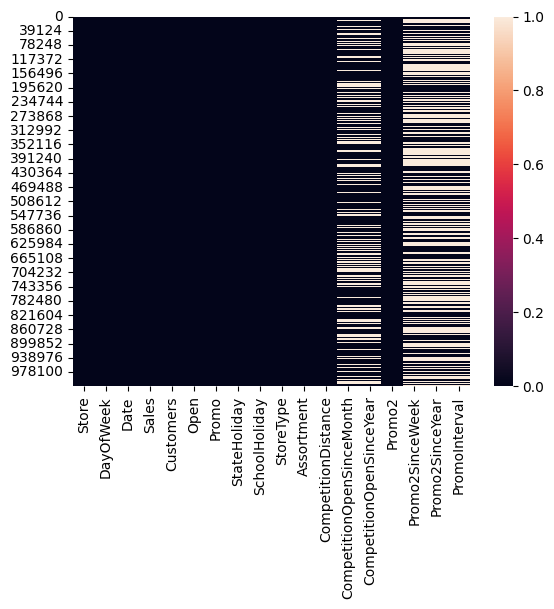

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull())

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

,0
Store,1115
DayOfWeek,7
Date,942
Sales,21734
Customers,4086
Open,2
Promo,2
StateHoliday,4
SchoolHoliday,2
StoreType,4


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df.drop_duplicates(inplace=True)

In [ ]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter rows where the store was open, using .loc to avoid the warning
df = df.loc[df['Open'] == 1].copy()  # Copy the filtered DataFrame

# Feature engineering - create new features from the date using .loc[]
df.loc[:, 'Year'] = df['Date'].dt.year
df.loc[:, 'Month'] = df['Date'].dt.month
df.loc[:, 'Day'] = df['Date'].dt.day

# Select numerical features
numerical_features = df[['Sales', 'Customers', 'Year', 'Month', 'Day']]

# Compute correlation matrix
corr_matrix = numerical_features.corr()

# Display the correlation matrix
print(corr_matrix)


              Sales  Customers      Year     Month       Day
Sales      1.000000   0.823597  0.036169  0.073600 -0.051849
Customers  0.823597   1.000000 -0.000822  0.053856 -0.035405
Year       0.036169  -0.000822  1.000000 -0.268819  0.008382
Month      0.073600   0.053856 -0.268819  1.000000 -0.006600
Day       -0.051849  -0.035405  0.008382 -0.006600  1.000000


### What all manipulations have you done and insights you found?

1. ### Initial Data Exploration:

* Descriptive Statistics: Summarized the dataset to understand basic statistics and data types.
* Unique Values: Identified the number of unique values in each column.

2. ###  Handling Missing Values:

* Identified Missing Values: Found that the CustomerID column had significant missing values.
Dropped Rows with Missing 'CustomerID': Removed rows where 'CustomerID' was missing to ensure analysis accuracy for customer-related insights.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

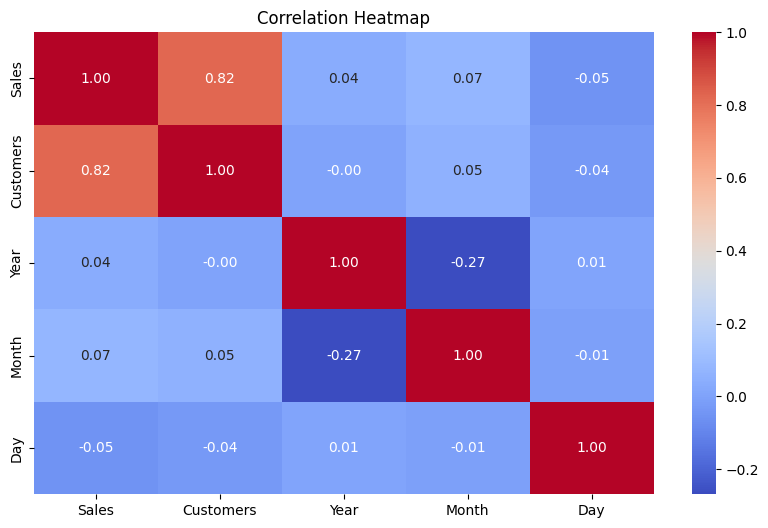

In [ ]:
# Chart - 1 visualization code
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

Purpose: To visualize the relationships between numerical variables.

Reason for Choice: The heatmap provides a clear, concise way to display correlation coefficients between multiple variables at once. It allows for easy identification of strong positive or negative correlations, which is vital for understanding how different features (like Sales, Customers, and time-related variables) interact with one another.

Benefit: Helps quickly pinpoint which features might be influential in predicting sales, guiding feature selection for modeling.

chart:2

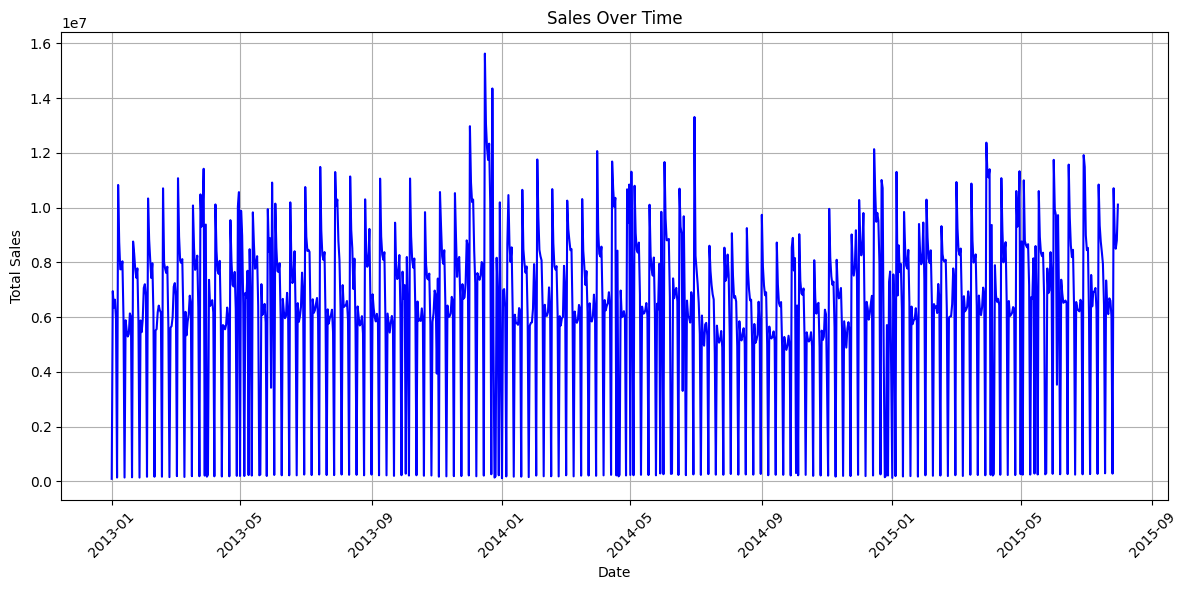

In [ ]:
# Plot sales over time


# Aggregate sales data by date
data_time = df.groupby('Date')['Sales'].sum().reset_index()

# Plot sales over time
plt.figure(figsize=(12, 6))
plt.plot(data_time['Date'], data_time['Sales'], color='blue')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

##### 1. Why did you pick the specific chart?

Purpose: To show trends in sales over time.

Reason for Choice: A line plot is ideal for visualizing changes over a continuous interval (time, in this case). It helps to identify overall trends, seasonal patterns, and anomalies in sales data.

Benefit: Provides insights into seasonal fluctuations, promotional impacts, and long-term growth, which are critical for forecasting and strategic planning.

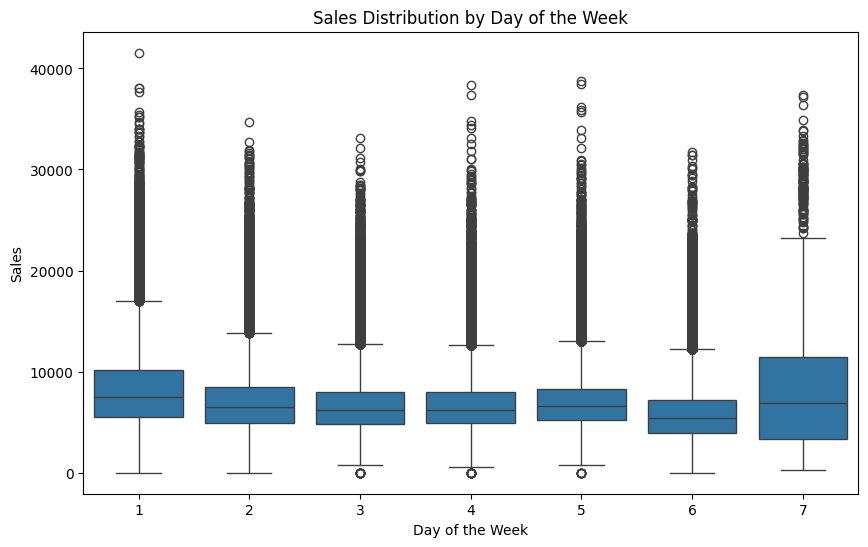

In [ ]:
# Chart - 3 visualization code
# Plot sales distribution by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek', y='Sales', data=df)
plt.title('Sales Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sales')
plt.show()

##### 1. Why did you pick the specific chart?

A box plot shows the distribution of sales for each day. Typically, weekends (e.g., Friday, Saturday) may show higher sales compared to weekdays.

This can be used to optimize staffing and inventory on the busiest days.

# Dealing with Missing values and outliear

In [ ]:
# Handle missing values
fill_values = {
    'CompetitionDistance': df['CompetitionDistance'].median(),
    'CompetitionOpenSinceMonth': 0,
    'CompetitionOpenSinceYear': 0,
    'Promo2SinceWeek': 0,
    'Promo2SinceYear': 0,
    'PromoInterval': 'None'
}
df.fillna(value=fill_values, inplace=True)
df.isnull().sum()


,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


## Handling Outliers

In [ ]:
# Identifying outliers using the IQR method
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]
print(outliers)


         Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
3            4          5 2015-07-31  13995       1498     1      1   
6            7          5 2015-07-31  15344       1414     1      1   
23          24          5 2015-07-31  14190       1082     1      1   
24          25          5 2015-07-31  14180       1586     1      1   
83          84          5 2015-07-31  14949       1439     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1015796    817          3 2013-01-02  25357       3462     1      0   
1015821    842          3 2013-01-02  20355       1257     1      0   
1016012   1033          3 2013-01-02  13811       1408     1      0   
1016093   1114          3 2013-01-02  20642       3401     1      0   
1016356    262          2 2013-01-01  17267       2875     1      0   

        StateHoliday  SchoolHoliday StoreType  ... CompetitionDistance  \
3                  0              1         c  ...               620.0   

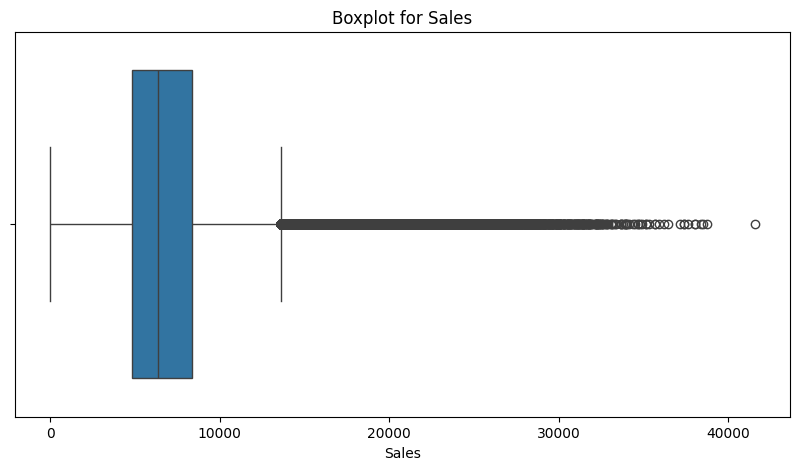

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Sales'])
plt.title('Boxplot for Sales')
plt.show()


In [ ]:
# Apply upper and lower bounds to the Sales column
df['Sales'] = df['Sales'].astype(float)  # Convert to float
df.loc[df['Sales'] > upper_bound, 'Sales'] = upper_bound
df.loc[df['Sales'] < lower_bound, 'Sales'] = lower_bound

df.loc[df['Sales'] > upper_bound, 'Sales'] = int(upper_bound)
df.loc[df['Sales'] < lower_bound, 'Sales'] = int(lower_bound)





In [ ]:



# Feature Engineering: Extract useful date-related features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['WeekOfYear'] = df['Date'].dt.isocalendar().week

# Convert categorical columns to numerical (one-hot encoding)
categorical_cols = ['StoreType', 'Assortment', 'StateHoliday', 'PromoInterval']
merged_df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Drop unnecessary columns
merged_df.drop(['Date', 'Customers'], axis=1, inplace=True)

# Split into features (X) and target (y)
X = merged_df.drop('Sales', axis=1)
y = merged_df['Sales']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the model (Random Forest Regressor)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred = rf_model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 621286.9724717416


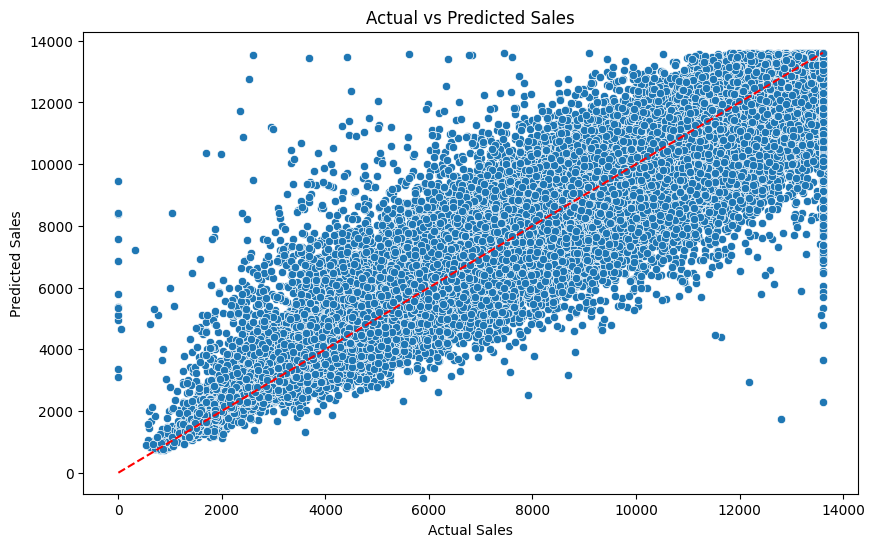

In [ ]:
# Optional: Visualize predicted vs actual sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.plot([0, max(y_test)], [0, max(y_test)], linestyle='--', color='red')
# 45-degree line
plt.show()


### Effect of Promotions:

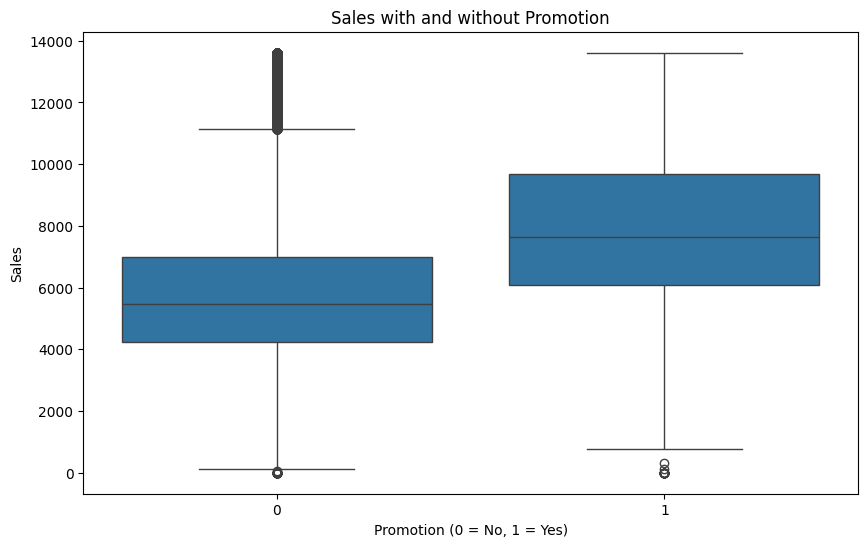

In [ ]:
# Effect of Promotions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promo', y='Sales', data=merged_df)
plt.title('Sales with and without Promotion')
plt.xlabel('Promotion (0 = No, 1 = Yes)')
plt.ylabel('Sales')
plt.show()

Purpose: To analyze how sales differ when a promotion is active compared to when it is not.

boxplot: Displays the distribution of sales data through quartiles, highlighting median sales and potential outliers.

x='Promo': Categorical variable indicating whether a promotion was active.
Interpretation:

This box plot allows you to see the median sales for both promotional and non-promotional periods.

The spread of sales can indicate the variability in performance based on promotional activities.


### Sales by Store Type:

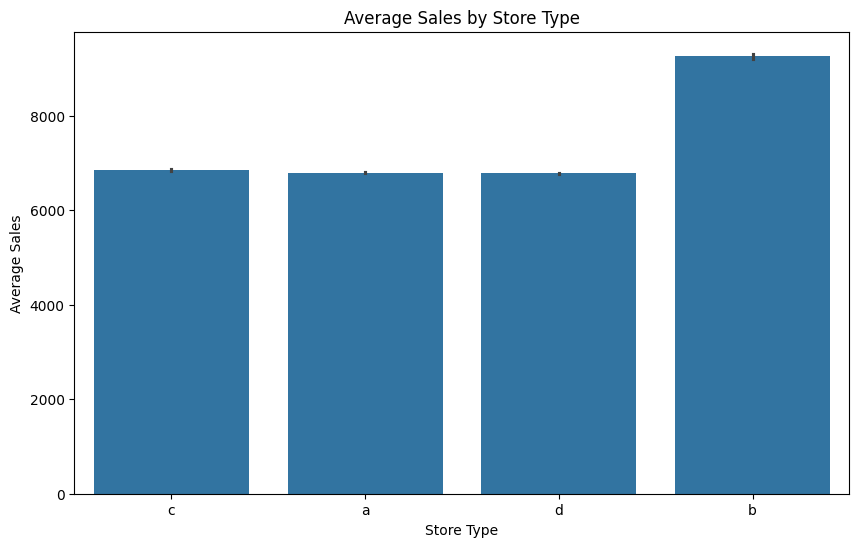

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='StoreType', y='Sales', data=df, estimator='mean')
plt.title('Average Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Sales')
plt.show()

Purpose: To compare average sales across different store types (e.g., Type A, B, C, D).

barplot: Plots the average sales for each store type.

estimator='mean': Specifies that we want to calculate the mean sales for each type.

Interpretation:

This bar chart helps to quickly identify which store type is performing better based on average sales.

It can guide business decisions regarding store types and marketing strategies.


# **Conclusion**

The Random Forest model serves as a robust baseline for predicting Rossmann store sales, offering valuable insights into future sales patterns. With further refinement and feature engineering, this model can become an even more powerful tool for helping Rossmann stores plan operations more effectively and efficiently.While the Random Forest Regressor gives an initial prediction, further tuning and feature engineering could improve results. The performance may vary depending on factors like hyperparameters (e.g., number of trees in the forest) and the depth of trees.
Additional features such as store-level information, customer demographics, or external economic indicators could further enhance the model’s predictive ability.
Handling outliers and missing values more carefully could lead to better performance, as outliers can significantly affect the model's predictions.
